<a href="https://colab.research.google.com/github/DeogjuLee/data_analysis_project1/blob/main/%EA%B3%84%EC%A0%88%2C%20%EC%97%B0%EB%8F%84%EB%B3%84%20%EC%A1%B0%ED%9A%8C%EC%88%98%20%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코랩에서 캐글 데이터 연동하기

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path =  "/content/gdrive/My Drive/Colab Notebooks/초급파이썬과데이터분석_2024/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# https://kubig-2021-2.tistory.com/35 참고
!pip install kaggle
from google.colab import files
files.upload()
# Chosse Files 에 캐글에서 다운받은 자신의 api key 파일 업로드

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"leedeogju","key":"683bf97f1eb0ce81d20986c0d6c23917"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rsrishav/youtube-trending-video-dataset

youtube-trending-video-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 BR_category_id.json	        gdrive			       MX_youtube_trending_data.csv
 BR_youtube_trending_data.csv   IN_category_id.json	       RU_category_id.json
 CA_category_id.json	        IN_youtube_trending_data.csv   RU_youtube_trending_data.csv
 CA_youtube_trending_data.csv   JP_category_id.json	       sample_data
 DE_category_id.json	        JP_youtube_trending_data.csv   SWEETVIZ_REPORT.html
 DE_youtube_trending_data.csv  'kaggle (1).json'	       US_category_id.json
 FR_category_id.json	        kaggle.json		       US_youtube_trending_data.csv
 FR_youtube_trending_data.csv   KR_category_id.json	       youtube-trending-video-dataset.zip
 GB_category_id.json	        KR_youtube_trending_data.csv
 GB_youtube_trending_data.csv   MX_category_id.json


In [ ]:
!unzip /content/youtube-trending-video-dataset.zip  ## 해당 파일들은 코랩 왼쪽 파일>content>sample_data 폴더 안에 있음

Archive:  /content/youtube-trending-video-dataset.zip
replace BR_category_id.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## csv 파일이랑 json파일 합쳐서 카테고리 설명변수 만들기

In [ ]:
import pandas as pd
kr_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/초급파이썬과데이터분석_2024/KR_youtube_trending_data.csv.zip')

In [ ]:
kr_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [ ]:
kr_df = kr_df.set_index("video_id") #ID를 인덱스로
kr_df

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
video_id,,,,,,,,,,,,,,,
uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l-H4QHLC-Uc,HAPPY,2024-03-18T09:00:37Z,UCFEVXX0YX4eT6tdNkXi40vg,DAY6 - Topic,10,2024-04-05T00:00:00Z,DAY6|Fourever|HAPPY,1533276,12865,0,166,https://i.ytimg.com/vi/l-H4QHLC-Uc/default.jpg,False,False,Provided to YouTube by JYP Entertainment Corpo...
oIjoqTj8bo4,엉성한 김말썽 QnA,2024-03-19T09:21:07Z,UC0IOhbfmgI2-k73cLj2ylaw,김말썽🐴,22,2024-04-05T00:00:00Z,[None],302529,6844,0,1263,https://i.ytimg.com/vi/oIjoqTj8bo4/default.jpg,False,False,#김말썽 #QnA안녕하세여? 김말썽인데요오늘 그토록 기다리던 QnA 찍었슴다솔직히 ...
E_yV_bfO6f8,"즉흥여행러 김숙X브라친구들, 숙소 예약도 없이 출발하는 무계획 싱가포르 여행! (f...",2024-03-18T11:00:12Z,UCvAewWPqooIUgQUsjhTmUVw,김숙티비kimsookTV,24,2024-04-05T00:00:00Z,김숙|kimsook|갓숙|비보티비|비밀보장|金淑|comedian|숙티비|김숙유튜브|...,1141368,18150,0,563,https://i.ytimg.com/vi/E_yV_bfO6f8/default.jpg,False,False,#먹방 #여행 #싱가포르본 영상은 싱가포르관광청의 유료 광고를 포함하고 있습니다.브...


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
report = sweetviz.analyze(kr_df)
report.show_html() #데이터들 있는 폴더에 SWEETVIZ_REPORT.html 파일 다운로드 후 확인 -> 대략적인 그래프 볼 수 있음

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import json

with open('/content/gdrive/My Drive/Colab Notebooks/초급파이썬과데이터분석_2024/KR_category_id.json', "r") as json_file:
    kr_json = json.load(json_file)
print(kr_json)

{'kind': 'youtube#videoCategoryListResponse', 'etag': 'kBCr3I9kLHHU79W4Ip5196LDptI', 'items': [{'kind': 'youtube#videoCategory', 'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc', 'id': '1', 'snippet': {'title': 'Film & Animation', 'assignable': True, 'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}, {'kind': 'youtube#videoCategory', 'etag': '5XGylIs7zkjHh5940dsT5862m1Y', 'id': '2', 'snippet': {'title': 'Autos & Vehicles', 'assignable': True, 'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}, {'kind': 'youtube#videoCategory', 'etag': 'HCjFMARbBeWjpm6PDfReCOMOZGA', 'id': '10', 'snippet': {'title': 'Music', 'assignable': True, 'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}, {'kind': 'youtube#videoCategory', 'etag': 'ra8H7xyAfmE2FewsDabE3TUSq10', 'id': '15', 'snippet': {'title': 'Pets & Animals', 'assignable': True, 'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}, {'kind': 'youtube#videoCategory', 'etag': '7mqChSJogdF3hSIL-88BfDE-W8M', 'id': '17', 'snippet': {'title': 'Sports', 'assignable': True, 'channelId': 'UCBR8-60-B28hp

In [ ]:
# # 'items' 항목에서 'id'와 'title' 추출하여 리스트로 저장
# ids = [item['id'] for item in kr_json['items']]
# titles = [item['snippet']['title'] for item in kr_json['items']]
# # 데이터프레임 생성
# kr_cat_df = pd.DataFrame({'id': ids, 'title': titles})


# 'id'와 'title' 추출하여 딕셔너리로 저장
id_title_dict = {item['id']: item['snippet']['title'] for item in kr_json['items']}
print(id_title_dict) # 1,2 다음에 바로 10, 15임)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [ ]:
# categoryId를 수치형에서 문자형으로 변환
kr_df = kr_df.astype({'categoryId':'str'})

# 'id'와 'categoryId'가 일치하는 경우에만 'title' 열을 추가
kr_df['category'] = kr_df['categoryId'].map(id_title_dict)

# 결과 확인 - 맨 앞에 title 열이 추가되어 있음
kr_df

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
video_id,,,,,,,,,,,,,,,,
uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,Entertainment
I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation
9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,People & Blogs
3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment
zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l-H4QHLC-Uc,HAPPY,2024-03-18T09:00:37Z,UCFEVXX0YX4eT6tdNkXi40vg,DAY6 - Topic,10,2024-04-05T00:00:00Z,DAY6|Fourever|HAPPY,1533276,12865,0,166,https://i.ytimg.com/vi/l-H4QHLC-Uc/default.jpg,False,False,Provided to YouTube by JYP Entertainment Corpo...,Music
oIjoqTj8bo4,엉성한 김말썽 QnA,2024-03-19T09:21:07Z,UC0IOhbfmgI2-k73cLj2ylaw,김말썽🐴,22,2024-04-05T00:00:00Z,[None],302529,6844,0,1263,https://i.ytimg.com/vi/oIjoqTj8bo4/default.jpg,False,False,#김말썽 #QnA안녕하세여? 김말썽인데요오늘 그토록 기다리던 QnA 찍었슴다솔직히 ...,People & Blogs
E_yV_bfO6f8,"즉흥여행러 김숙X브라친구들, 숙소 예약도 없이 출발하는 무계획 싱가포르 여행! (f...",2024-03-18T11:00:12Z,UCvAewWPqooIUgQUsjhTmUVw,김숙티비kimsookTV,24,2024-04-05T00:00:00Z,김숙|kimsook|갓숙|비보티비|비밀보장|金淑|comedian|숙티비|김숙유튜브|...,1141368,18150,0,563,https://i.ytimg.com/vi/E_yV_bfO6f8/default.jpg,False,False,#먹방 #여행 #싱가포르본 영상은 싱가포르관광청의 유료 광고를 포함하고 있습니다.브...,Entertainment


## 데이터 전처리


In [ ]:
kr_df.head()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
video_id,,,,,,,,,,,,,,,,
uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,Entertainment
I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation
9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,People & Blogs
3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment
zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music


In [ ]:
print ("Rows     : " , kr_df.shape[0]) #Displays numbers of rows .
print ("Columns  : " , kr_df.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", kr_df.columns.tolist())#displays column names
print ("\nMissing values :  ", kr_df.isnull().sum().values.sum())   #find missing values
print("\nMissing values by columns: ", kr_df.isnull().sum()) #find missing values per columns--> description, category에 결측치?
print ("\nUnique values :  \n", kr_df.nunique())  # Count distinct observations


Rows     :  263754
Columns  :  16

Features : 
 ['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'category']

Missing values :   5347

Missing values by columns:  title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4797
category              550
dtype: int64

Unique values :  
 title                 30064
publishedAt           27743
channelId              3579
channelTitle           3888
categoryId               15
trending_date          1313
tags                  20103
view_count           2

In [ ]:
import re
k = open("/content/gdrive/My Drive/Colab Notebooks/초급파이썬과데이터분석_2024/KR_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

##2020~2023 데이터, 그래프 추출

In [ ]:
# CSV 파일 읽어들이기
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/초급파이썬과데이터분석_2024/KR_youtube_trending_data.csv.zip')

In [ ]:
#2021 데이터 추출

import pandas as pd

# 데이터프레임에서 'publishedAt' 열을 datetime 형식으로 읽어온다
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# 'publishedAt' 열에서 2021년에 해당하는 행만 필터링
videos_in_2021 = df[df['publishedAt'].dt.year == 2021]

# 결과 확인
print(videos_in_2021.head)


<bound method NDFrame.head of            video_id                                              title  \
24756   5E6orwJUZiA      MBC방송연예대상 2부 대환장 꿀잼 모먼트 #TVPP | MBC 201229 방송   
24758   IRZYinAXlQo             [EP114]※충격※모든 걸 잃고 한순간에 신용불량자 된 모델 지연수   
24760   HgJpGloC0To  처음부터 끝까지 터짐 주의 😆 MBC방송연예대상 1부 대환장 꿀잼 모먼트#TVPP ...   
24761   eciwC70eyOo        일본 유일의 산후조리원에서 초보 엄마 되기 [엄마,사유리_7화] - 사유리TV   
24762   ojahoYw9zpY                                    [동충하초] 동충이의 첫연애   
...             ...                                                ...   
101542  P9RmDgrSdLA           Meenoi's Yorizori Season2 | EP.3 GIRIBOY   
101545  gu9E-uqYHrw                      파피 플레이타임 짝퉁 장난감 총모음ㄷㄷ #Shorts   
101550  BeU9ha2tt98  가족을 위해 한국에서 일하느라 5살 아들을 한 번도 본 적이 없는 방글라데시 아빠 ...   
101551  RSOI-_2QkU0  (ENG) 혜진이는 무슨 죄야 안방에 설경구 포스터 붙여놔서 아침마다 전혜진이 깜짝...   
101553  FXfvbMEWkhk                                 Winter Sleep (겨울잠)   

                     publishedAt                 channelId  \
24756  2021-01-01 1

In [ ]:
# 'publishedAt' 열에서 월 정보를 추출하여 새로운 열 추가
videos_in_2021['month'] = videos_in_2021['publishedAt'].dt.month

# 월별로 데이터 그룹화
videos_by_month = videos_in_2021.groupby('month')

# 월별로 그룹화된 데이터 확인
for month, group in videos_by_month:
    print(f"Month {month}:")
    print(group)


Month 1:
          video_id                                              title  \
24756  5E6orwJUZiA      MBC방송연예대상 2부 대환장 꿀잼 모먼트 #TVPP | MBC 201229 방송   
24758  IRZYinAXlQo             [EP114]※충격※모든 걸 잃고 한순간에 신용불량자 된 모델 지연수   
24760  HgJpGloC0To  처음부터 끝까지 터짐 주의 😆 MBC방송연예대상 1부 대환장 꿀잼 모먼트#TVPP ...   
24761  eciwC70eyOo        일본 유일의 산후조리원에서 초보 엄마 되기 [엄마,사유리_7화] - 사유리TV   
24762  ojahoYw9zpY                                    [동충하초] 동충이의 첫연애   
...            ...                                                ...   
32548  nArgI2cJyeg  평생 닭가슴살만 먹던 강민이형 제대로 타락시키기 bhc 신메뉴 포테킹 후라이드치킨 ...   
32712  apyTUQl-o3g  (역대급 사연) 호적에 '친자 아닌' 아이가 2명?? 몰래 다른 사람의 아이를 호적...   
32749  LXbgnUuX4sg                                 Let's Have a Drink   
32928  apyTUQl-o3g  (역대급 사연) 호적에 '친자 아닌' 아이가 2명?? 몰래 다른 사람의 아이를 호적...   
33148  apyTUQl-o3g  (역대급 사연) 호적에 '친자 아닌' 아이가 2명?? 몰래 다른 사람의 아이를 호적...   

                    publishedAt                 channelId  \
24756 2021-01-01 15:00:04+00:00  UC1cWTErb7vw_UmmuB0d

<ipython-input-24-2f95831d89e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos_in_2021['month'] = videos_in_2021['publishedAt'].dt.month


          video_id                                              title  \
75354  xnI1QBVKJEI                 삼겹살에 치즈김치볶음밥 처음 먹어본 영국 고등학생들의 반응!?   
75355  uvAvQvPJ_H4                                              근데노인정   
75356  xxUYutB4p2o     [스우파/2회 풀캠] 〈계급 미션〉 메인 댄서 선발전 l 리더 계급#스트릿우먼파이터   
75357  VCmpkk789H0  장인들의 노래 ㅣ 발젭 x 캐인 x 막내현진 x 시간의숲 x 새루 x 병병병 x 순...   
75358  b96oSVw75lA                             오징어 게임 | 공식 예고편 | 넷플릭스   
...            ...                                                ...   
83549  edyKEdFn-rk                               마지막 면접 : 장지수, 꽈뚜룹 본캐   
83552  tqOKLxlbLhQ                     🍃훨훨훨🍃과 함께 도장깨기로 날아온 유진공쥬 👸전유진👸   
83736  3YqPKLZF_WU      Coldplay X BTS - My Universe (Official Video)   
83750  gNoGDvINq4g           📢“잠깐! 유진이한테 하고싶었던 얘기 생각났어!” 장윤정이 하려는 말은?   
83945  3YqPKLZF_WU      Coldplay X BTS - My Universe (Official Video)   

                    publishedAt                 channelId  \
75354 2021-09-01 11:30:24+00:00  UCg-p3lQIqmhh7gHpyaOmOiQ   
7

In [ ]:
import matplotlib.pyplot as plt

# 나눔고딕 폰트를 사용하도록 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 월별 조회수 집계
monthly_views = videos_in_2021.groupby('month')['view_count'].sum()


print("월별 조회수 집계:")
print(monthly_views)

월별 조회수 집계:
month
1      6569722499
2      7460625237
3      9110642739
4      8012759593
5     16261951886
6     11887752626
7     11205331513
8      9878033054
9     12481707253
10    12362175900
11     7195406005
12     9556109760
Name: view_count, dtype: int64


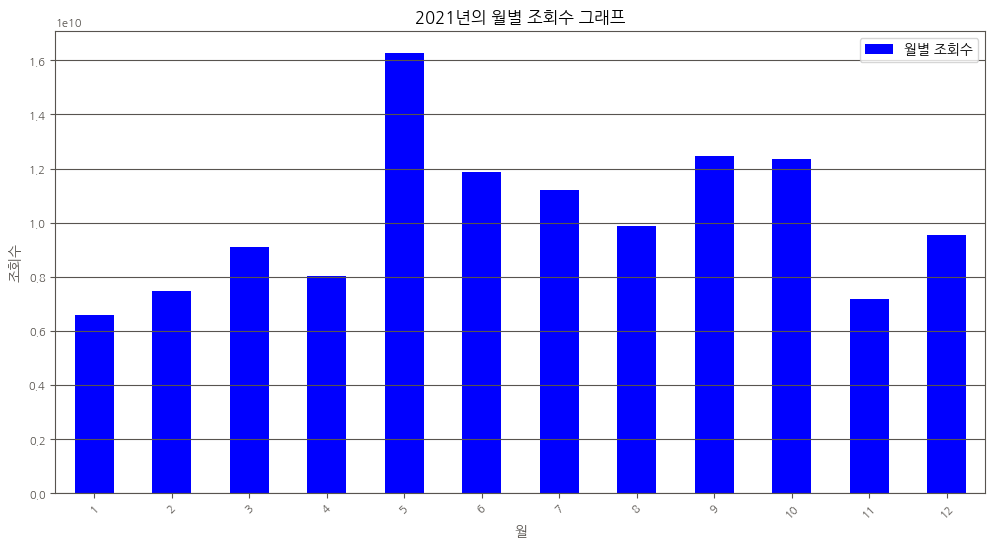

In [ ]:
import matplotlib.pyplot as plt

# 월별 조회수 집계
monthly_views = videos_in_2021.groupby('month')['view_count'].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))

# 월별 조회수 막대 그래프
monthly_views.plot(kind='bar', color='blue', label='월별 조회수')

# 그래프 제목과 라벨 설정
plt.title('2021년의 월별 조회수 그래프')
plt.xlabel('월')
plt.ylabel('조회수')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# y축 그리드 표시
plt.grid(axis='y')

# 그래프 출력
plt.show()


In [ ]:
#2022 데이터 추출

import pandas as pd

# 데이터프레임에서 'publishedAt' 열을 datetime 형식으로 읽어온다
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# 'publishedAt' 열에서 2022년에 해당하는 행만 필터링
videos_in_2022 = df[df['publishedAt'].dt.year == 2022]

# 결과 확인
print(videos_in_2022.head)


<bound method NDFrame.head of            video_id                                              title  \
99354   uBY1AoiF5Vo               GOT the beat 'Step Back' Stage Video   
99355   WZkfo2vWbwU  Davinson Sanchez leaves it late! | HIGHLIGHTS ...   
99357   eF3efrZ04Qo  [가요대제전 4K 직캠] 임윤아&이준호 'Señorita' (YOONA&JUNHO ...   
99358   AnbIPTxuE1g  전륜, 후륜, 4륜구동 성능 차이 없었다? … 스프레이 체인 vs 우레탄 체인 vs...   
99361   FA7iJXMSI7Q           [옷소매 붉은 끝동 OST] 이선희 - 그대 손 놓아요 (녹음실 풀버전)   
...             ...                                                ...   
175136  Km71Rr9K-Bw           NewJeans (뉴진스) 'Ditto' Performance Video   
175137  OHS1PYKoGuQ  [2022 MBC 가요대제전] 99즈 (우기,아린,유정,츄,예나) - 스텝 (STE...   
175142  dvTy6K7gU80  [KBS 2022 연기대상] 2022년 영예의 대상은! 주상욱＆이승기 두 사람의 공...   
175143  rYyUpQ_veL4                                   YG NEXT MOVEMENT   
175348  W7h5exjKWZ8                                    [ENG] 신년모임은 핑계고   

                     publishedAt                 channelId       channelTitle  \


In [ ]:
# 'publishedAt' 열에서 월 정보를 추출하여 새로운 열 추가
videos_in_2022['month'] = videos_in_2022['publishedAt'].dt.month

# 월별로 데이터 그룹화
videos_by_month = videos_in_2022.groupby('month')

# 월별로 그룹화된 데이터 확인
for month, group in videos_by_month:
    print(f"Month {month}:")
    print(group)


Month 1:
           video_id                                              title  \
99354   uBY1AoiF5Vo               GOT the beat 'Step Back' Stage Video   
99355   WZkfo2vWbwU  Davinson Sanchez leaves it late! | HIGHLIGHTS ...   
99357   eF3efrZ04Qo  [가요대제전 4K 직캠] 임윤아&이준호 'Señorita' (YOONA&JUNHO ...   
99358   AnbIPTxuE1g  전륜, 후륜, 4륜구동 성능 차이 없었다? … 스프레이 체인 vs 우레탄 체인 vs...   
99361   FA7iJXMSI7Q           [옷소매 붉은 끝동 OST] 이선희 - 그대 손 놓아요 (녹음실 풀버전)   
...             ...                                                ...   
107953  wG10ni2Sn5Y                      김계란 쳐맞는 영상.. 레전드 박종팔 주먹 속도 ㄷㄷ   
108115  UQBtLJw1f38  정동원＆박애리 - 어머니와아들 [2022 설 대기획 여러분 고맙습니다 송해] | K...   
108150  rZ6sT9nFm6c                          절대로 평범하지 않은 최고급 떡국 비밀 레시피   
108323  UQBtLJw1f38  정동원＆박애리 - 어머니와아들 [2022 설 대기획 여러분 고맙습니다 송해] | K...   
108544  UQBtLJw1f38  정동원＆박애리 - 어머니와아들 [2022 설 대기획 여러분 고맙습니다 송해] | K...   

                     publishedAt                 channelId       channelTitle  \
99354  2022-01-01 10:

<ipython-input-28-937294ffd981>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos_in_2022['month'] = videos_in_2022['publishedAt'].dt.month


In [ ]:
# 월별 조회수 집계
monthly_views = videos_in_2021.groupby('month')['view_count'].sum()


print("월별 조회수 집계:")
print(monthly_views)

월별 조회수 집계:
month
1      6569722499
2      7460625237
3      9110642739
4      8012759593
5     16261951886
6     11887752626
7     11205331513
8      9878033054
9     12481707253
10    12362175900
11     7195406005
12     9556109760
Name: view_count, dtype: int64


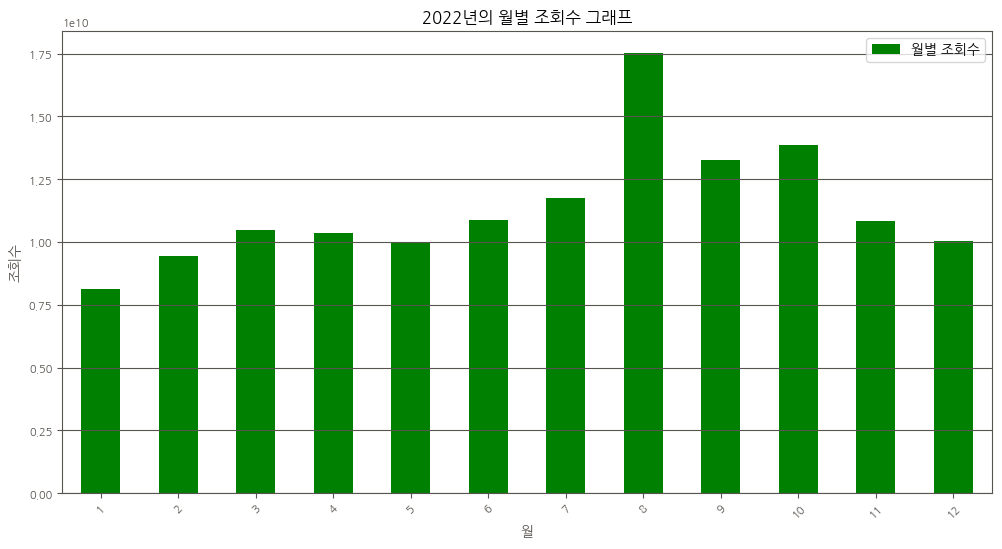

In [ ]:
monthly_views = videos_in_2022.groupby('month')['view_count'].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))

# 월별 조회수 막대 그래프
monthly_views.plot(kind='bar', color='green', label='월별 조회수')

# 그래프 제목과 라벨 설정
plt.title('2022년의 월별 조회수 그래프')
plt.xlabel('월')
plt.ylabel('조회수')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# y축 그리드 표시
plt.grid(axis='y')

# 그래프 출력
plt.show()


In [ ]:
#2023 데이터 추출

import pandas as pd

# 데이터프레임에서 'publishedAt' 열을 datetime 형식으로 읽어온다
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# 'publishedAt' 열에서 2023년에 해당하는 행만 필터링
videos_in_2023 = df[df['publishedAt'].dt.year == 2023]

# 결과 확인
print(videos_in_2023.head)


<bound method NDFrame.head of            video_id                                              title  \
172357  tUCT82t1Y8Q             GOT the beat 'Stamp On It' Stage Video   
172359  4meIvHTBYJc             G-DRAGON - GUERRILLA DESK : G_Division   
172361  T2h686YMNSg            시골 살이는 한 살이라도 젊을 때 해야 되는 이유.. 살아보니 알겠네요   
172363  vDLYMzW98h0  배추물김치 찹쌀풀 대신 이걸 넣어 보세요!! 간단하고 건강하고 맛있어요/ 익힐수록 ...   
172364  G_1zDzhAz9w              NewJeans (뉴진스) 'Ditto' Dance Practice   
...             ...                                                ...   
247353  dyc9X-r_o4o  [덱스의 냉터뷰] 잘생기면 다 오빠지🐰💕 중전과 후궁의 설레는 환생극 어떤데💥l E...   
247517  bGil7Wxi1nA                                   [ENG] 새해 인사는 핑계고   
247546  WrKNUpJN0ZE                               [한글자막] 브라이언에게 먼지가 묻다   
247731  bGil7Wxi1nA                                   [ENG] 새해 인사는 핑계고   
247938  bGil7Wxi1nA                                   [ENG] 새해 인사는 핑계고   

                     publishedAt                 channelId  \
172357 2023-01-01 1

In [ ]:
# 'publishedAt' 열에서 월 정보를 추출하여 새로운 열 추가
videos_in_2023['month'] = videos_in_2023['publishedAt'].dt.month

# 월별로 데이터 그룹화
videos_by_month = videos_in_2023.groupby('month')

# 월별로 그룹화된 데이터 확인
for month, group in videos_by_month:
    print(f"Month {month}:")
    print(group)


Month 1:
           video_id                                              title  \
172357  tUCT82t1Y8Q             GOT the beat 'Stamp On It' Stage Video   
172359  4meIvHTBYJc             G-DRAGON - GUERRILLA DESK : G_Division   
172361  T2h686YMNSg            시골 살이는 한 살이라도 젊을 때 해야 되는 이유.. 살아보니 알겠네요   
172363  vDLYMzW98h0  배추물김치 찹쌀풀 대신 이걸 넣어 보세요!! 간단하고 건강하고 맛있어요/ 익힐수록 ...   
172364  G_1zDzhAz9w              NewJeans (뉴진스) 'Ditto' Dance Practice   
...             ...                                                ...   
181543  Sc62y-areIA                                       COLOGNE vlog   
181547  uVWUshCqr3c         어제보다 오늘 더 웃깁니다.. (Feat. 차태현, 장혁, 홍경민, 홍경인)   
181553  fg91qy1BnSk  [가수 정미애 다시 시작] (1/15) [인간극장/Screening Humanity...   
181752  HG8q8VQkSQM  착한 성격에 그렇지 못한 보디💪 데려온 지 두 달 만에 근육질 몸매로 변해버린 반려...   
181753  R9XpA_zXDDI                         NCT 127 엔시티 127 'Ay-Yo' MV   

                     publishedAt                 channelId  \
172357 2023-01-01 13:00:24+00:00  UCcdX9

<ipython-input-32-750be3c60489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos_in_2023['month'] = videos_in_2023['publishedAt'].dt.month


           video_id                                              title  \
232357  R1mDQqhWEcU  [선공개] 방시혁 작곡 영감의 원천은 찜질방 양머리?!#유퀴즈온더블럭 | YOU Q...   
232554  ssctL0kNEk8  [ENG] 대한민국 FC일짱은 접니다! 흥민이형 드루ㅇ? 아니 왜 진짜 나와?!  ...   
232555  pDq9VCWZs50             인생 처음으로 한의원에서 침을 맞고 기적(!!)을 경험한 미국 할머니   
232556  Cj8XqmFe-II  김국진, 30년 만에 이경규에게서 또라이 봉인해제된 사연?! l 예능대부 갓경규 E...   
232557  dTBsPShaBro                     여행 딴따라들과 함께한 가오슝 배낭여행 시작 【대만1】   
...             ...                                                ...   
241746  QRx0UP4ZwgY                제주도로 떠난 이지혜 가족의 다이나믹한 일상(제주살이,최초공개)   
241747  UyOj_GREFuQ  Wolves Players try Korean Street Food for the ...   
241749  Rv_zLMZTclc                    스위스여행 2시간만에 끝내는 사람 어떤데⎥🇫🇷프랑스위스2   
241753  umS423rkPoc                                    일주일만에 15키로 찐 남자   
241948  rPyAf-9dGSk         [sub] 성시경의 만날텐데 l 정우성 🩵 내 청춘의 정우성이 내 앞에..✨   

                     publishedAt                 channelId  \
232357 2023-11-01 01:51:59+00:00  UC920m3pMPH45qz

In [ ]:
# 월별 조회수 집계
monthly_views = videos_in_2023.groupby('month')['view_count'].sum()


print("월별 조회수 집계:")
print(monthly_views)

월별 조회수 집계:
month
1     12091550665
2      6723972547
3     12800348349
4     11662501152
5     12474787478
6      8827626195
7     12924031058
8     12712235081
9     11305378134
10    14530857905
11    14307545645
12    17698561930
Name: view_count, dtype: int64


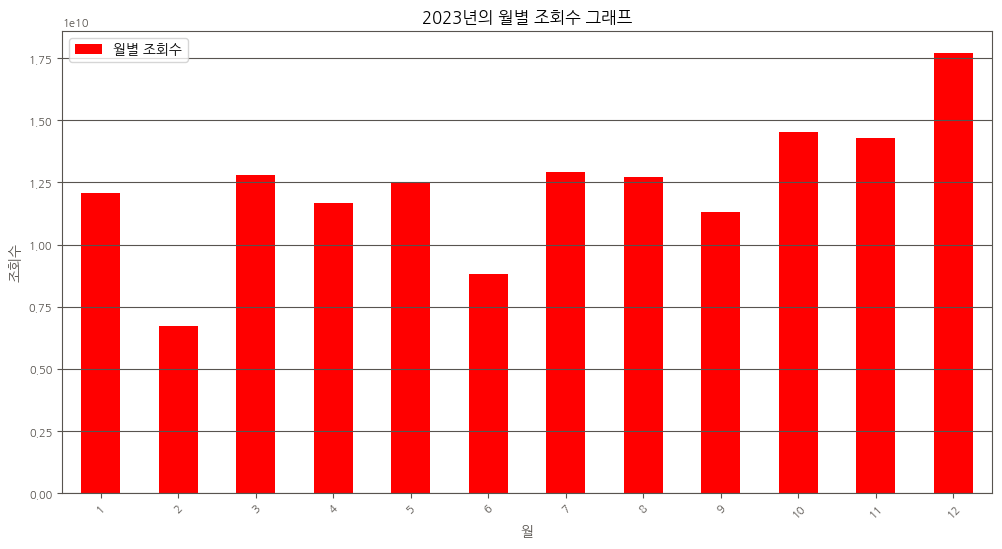

In [ ]:
# 월별 조회수 집계
monthly_views = videos_in_2023.groupby('month')['view_count'].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))

# 월별 조회수 막대 그래프
monthly_views.plot(kind='bar', color='red', label='월별 조회수')

# 그래프 제목과 라벨 설정
plt.title('2023년의 월별 조회수 그래프')
plt.xlabel('월')
plt.ylabel('조회수')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# y축 그리드 표시
plt.grid(axis='y')

# 그래프 출력
plt.show()

##계절별 그래프

In [ ]:
import pandas as pd

# CSV 파일 읽어들이기
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/초급파이썬과데이터분석_2024/KR_youtube_trending_data.csv.zip')

# 날짜 데이터를 datetime 형식으로 변환
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# 연도, 월, 일 정보 추출
df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df['day'] = df['publishedAt'].dt.day


# 계절 정보 추출
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)


In [ ]:
# 계절 정보 추가
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)

print(df)


           video_id                                              title  \
0       uq5LClQN3cE                                        안녕하세요 보겸입니다   
1       I-ZbZCHsHD0                                 부락토스의 계획 [총몇명 프리퀄]   
2       9d7jNUjBoss                                    평생 반성하면서 살겠습니다.   
3       3pI_L3-sMVg                               안녕하세요 꽈뚜룹입니다.   
4       zrsBjYukE8s   박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   
...             ...                                                ...   
263749  l-H4QHLC-Uc                                              HAPPY   
263750  oIjoqTj8bo4                                        엉성한 김말썽 QnA   
263751  E_yV_bfO6f8  즉흥여행러 김숙X브라친구들, 숙소 예약도 없이 출발하는 무계획 싱가포르 여행! (f...   
263752  J8TVPuXAu18  [내꺼내먹_EP.11] 어머니 손맛이 그리웠다구요! 아낌없이 내어주는 원주 골목식당...   
263753  64WFMICYQ9w  DAY6(데이식스) - Welcome to the Show | 야외녹음실 | Bey...   

                     publishedAt                 channelId  \
0      2020-08-09 09:32:48+00:00  UCu9BCtGIEr73LX

##계절&연도별 조회수 그래프

In [ ]:
# 계절별 조회수 집계
seasonal_views = df.groupby('season')['view_count'].sum()

# 계절 순서 설정
new_season_order = ['봄', '여름', '가을', '겨울']

# 계절별 조회수 데이터 재정렬
seasonal_views = seasonal_views.reindex(new_season_order)

print("계절별 조회수 집계")
print(seasonal_views)



계절별 조회수 집계
season
봄     112034455672
여름    115332257978
가을    136220888410
겨울    116299840856
Name: view_count, dtype: int64


In [ ]:
sydf=df.groupby(['season','year'])['view_count'].sum().unstack('year')
print(sydf)

# 계절 순서 설정
new_season_order = ['봄', '여름', '가을', '겨울']

# 계절별 조회수 데이터 재정렬
sydf=sydf.reindex(new_season_order)
print(sydf)

# '2020' 열 제거
sydf = sydf.drop(2020, axis=1)
print(sydf.head())

# '2024' 열 제거
sydf = sydf.drop(2024, axis=1)
print(sydf.head())

year            2020          2021          2022          2023          2024
season                                                                      
가을      2.610747e+10  3.203929e+10  3.793035e+10  4.014378e+10           NaN
겨울      6.384968e+09  2.358646e+10  2.762014e+10  3.651409e+10  2.219419e+10
봄                NaN  3.338535e+10  3.088570e+10  3.693764e+10  1.082576e+10
여름      7.757151e+09  3.297112e+10  4.014010e+10  3.446389e+10           NaN
year            2020          2021          2022          2023          2024
season                                                                      
봄                NaN  3.338535e+10  3.088570e+10  3.693764e+10  1.082576e+10
여름      7.757151e+09  3.297112e+10  4.014010e+10  3.446389e+10           NaN
가을      2.610747e+10  3.203929e+10  3.793035e+10  4.014378e+10           NaN
겨울      6.384968e+09  2.358646e+10  2.762014e+10  3.651409e+10  2.219419e+10
year            2021          2022          2023          2024
season       

In [ ]:
sydf_rate = sydf.copy()

sydf_rate = round(sydf_rate.div(sydf_rate[[2021, 2022, 2023]].sum(axis=1), axis=0), 2)

print(sydf_rate)


year    2021  2022  2023
season                  
봄       0.33  0.31  0.36
여름      0.31  0.37  0.32
가을      0.29  0.34  0.36
겨울      0.27  0.31  0.42


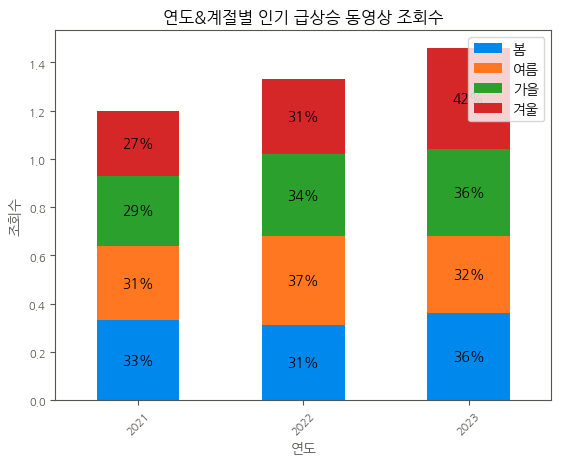

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 프레임 생성
data = {
    'year': [2021, 2022, 2023],
    '봄': [0.33, 0.31, 0.36],
    '여름': [0.31, 0.37, 0.32],
    '가을': [0.29, 0.34, 0.36],
    '겨울': [0.27, 0.31, 0.42]
}

df = pd.DataFrame(data)
df.set_index('year', inplace=True)

# 그래프 그리기
ax= df.plot(kind='bar', stacked=True)

# 막대 위에 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center', va='center')

# 그래프 제목과 라벨 설정
plt.title('연도&계절별 인기 급상승 동영상 조회수')
plt.xlabel('연도')
plt.ylabel('조회수')
plt.xticks(rotation=45)

# 범례 표시
plt.legend()


# 그래프 출력
plt.show()

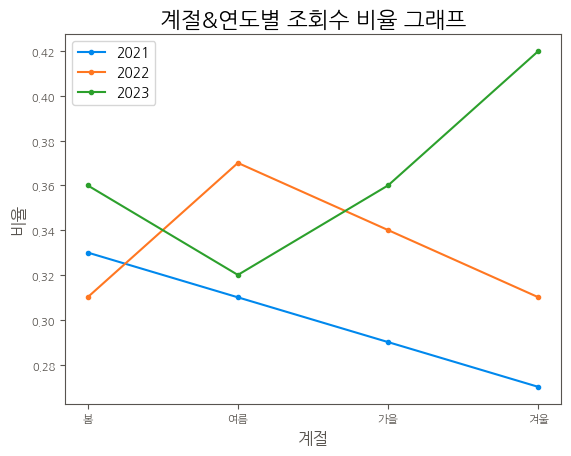

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 프레임 생성
data = {
    'season' : ['봄', '여름', '가을', '겨울'],
    '2021': [0.33, 0.31, 0.29, 0.27],
    '2022': [0.31, 0.37, 0.34, 0.31],
    '2023': [0.36, 0.32, 0.36, 0.42]
}
df = pd.DataFrame(data)
df.set_index('season', inplace=True)

# 각 계절에 대한 다중 꺾은선 그래프 그리기
for year in df.columns:
    plt.plot(df.index, df[year], marker='o', label=year)

plt.title('계절&연도별 조회수 비율 그래프', fontsize=16)
plt.xlabel('계절', fontsize=12)
plt.ylabel('비율', fontsize=12)
plt.legend()
plt.show()
